# Descarga del dataset

A continuación se procede a descargar el dataset y la explicación de sus atributos. Puedes ver la desscripción de las variables en el siguiente enlace:

*  https://docs.google.com/spreadsheets/d/14BSxqB__-Uj_XxYPcupHVbaeLBr6Y_zIrdEwE4dlDkY









In [53]:
#añade las librerías básicas que consideres necesarias para el proyecto (pongo 3). Posteriormente podrás añadir más librerías. 
import os
import numpy as np 
import pandas as pd 

#https://drive.google.com/file/d/1lqQViFzrT3HFZJY-AIjqUTtJANRwdRmr
!gdown --id 1lqQViFzrT3HFZJY-AIjqUTtJANRwdRmr

## Carga del fichero en Python
df_train = pd.read_csv('Leads.csv', delimiter=',')

df_train.head(5)


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lqQViFzrT3HFZJY-AIjqUTtJANRwdRmr
To: /content/Leads.csv
100% 2.37M/2.37M [00:00<00:00, 166MB/s]


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Enunciado

*  Construir un modelo de aprendizaje automático que
permita predecir si un cliente potencial se convertirá
en cliente real.

* Se trata de un problema de clasificación binaria. La variable objetivo será la columna Converted, que
indicará con un 1 si el cliente se ha convertido en
cliente real, o con un 0 en caso contrario.

* Se recomienda realizar un análisis del dataset y un preprocesamiento de los datos antes de generar el modelo. Puedes utilizar el modelo que desees. 

* Las operaciones sobre el dataset se deberán encuadrar en cada una de las secciones que se definen a continuación en el documento. 

* El modelo se ha conseguido entrenar con dicho dataset logrando una precisión del ~90%.


# 1. Análisis del dataset (2 puntos)

**Antes de comenzar con el preprocesamiento de los datos necesitamos analizarlos y entender un poco el dataset. Utiliza las diferentes funciones y gráficos que hemos visto para hacerte una idea del dataset con el que estamos trabajando. Esta información guiará el preprocesamiento de los datos.**

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<ipython-input-55-a9549af9dc41>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot = True)


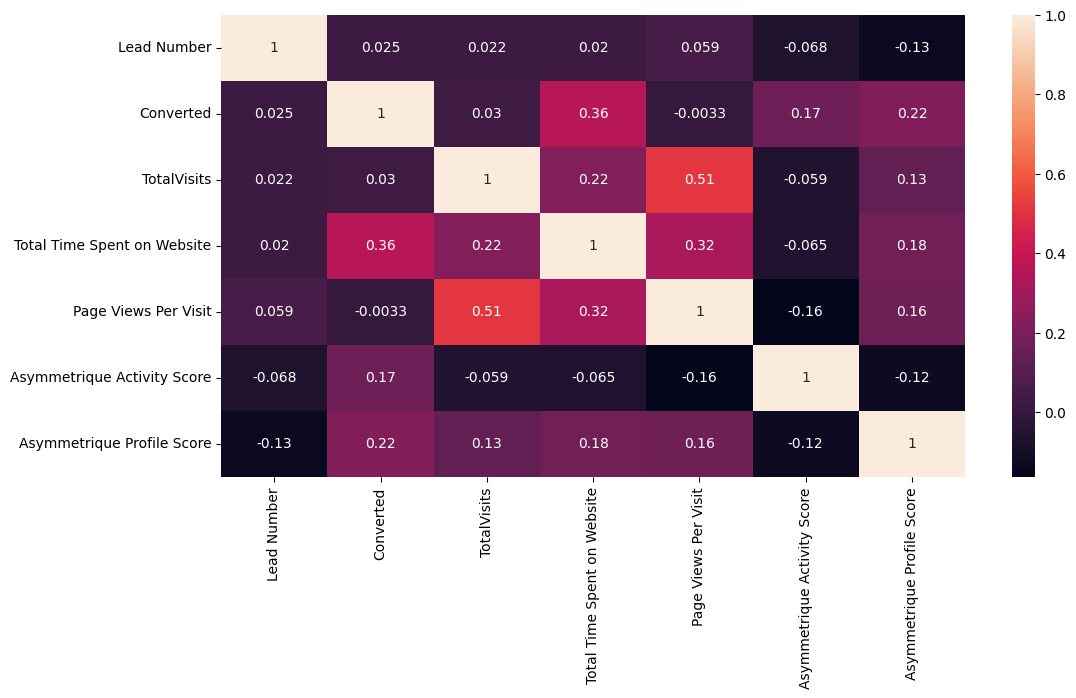

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
#visualizar la matriz de correlación (utiliza una librería de visualización)
plt.figure(figsize = (12,6))
sns.heatmap(df_train.corr(),annot = True)
plt.show()

([<matplotlib.patches.Wedge at 0x7f56c7fe06a0>,
 [Text(-0.38756250774201845, 1.0294635994500816, 'Has converted'),
  Text(0.3875624113566783, -1.0294636357362978, 'Did not convert')])

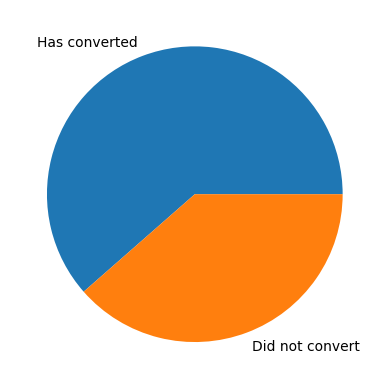

In [56]:
import matplotlib.pyplot as plt
#visualización
no_converted = df_train[df_train['Converted'] == 0].shape[0]
converted = df_train[df_train['Converted'] == 1].shape[0]
plt.pie([no_converted, converted], labels=['Has converted', 'Did not convert'])

#2. Preprocesamiento del dataset (2 puntos)


**Dentro del preprocesamiento del dataset puedes utilizar diferentes técnicas como las vistas en (https://colab.research.google.com/drive/1wRjnm9sIkfBVef2VGoT6nsk77nmdR3j7). Por ejemplo:**

*   **Baleancear los datos**
*   **Eliminar columnas por los motivos que consideres (muchos valores nulos, no está correlacionado con la clase a predecir, ...)**
*   **Modificar columnas. Por ejemplo sutituir valores nulos por otros, clasificar una columna numérica en diferentes grupos (por ejemplo, cuartiles), ...**
*   **Crear nuevas columnas. Por ejemplo eliminando columnas categóricas, agregando un conjunto de columnas en otra, ...**
*   **Normalizar los datos**
*   **...**

In [57]:
# Rellenar valores nulos con la moda
df_train.fillna(df_train.mode().iloc[0], inplace=True)

### Downsampling

In [58]:
from sklearn.utils import resample

# Reducir ocurrencias a clase menor
df_may = df_train[df_train['Converted'] == 1]
df_min = df_train[df_train['Converted'] == 0]

df_majority_downsampled = resample(df_min, 
                                 n_samples=len(df_may),
                                 replace=True) 

df_train = pd.concat([df_may, df_majority_downsampled])

###Descategorizar columnas mediante OneHotEncode
Para ello obtenemos las variables categoricas y las transformamos solo las que tengan un maximo de 12 valores unicos con la funcion anterior de `onehot_encode` el resto de columnas seran eliminadas





In [59]:
# Descategorizar columnas
def onehot_encode(df, column):
    for name in column:
      df = df.copy()
      dummies = pd.get_dummies(df[name], prefix=name) 

      df = pd.concat([df, dummies], axis=1)
      df = df.drop(name, axis=1)         
    return df

In [60]:
categorical_columns = (df_train.dtypes[df_train.dtypes == 'object'].index)

for x in categorical_columns:
  # if df_train[x].unique().size <= 30: # Limitar a X clases diferentes
  df_train = onehot_encode(df_train, [x])
  #else:
    #df_train.pop(x)

###Eliminar columnas con poco peso para el resutlado 
Dado que el valor de estas columnas no ejercen casi peso en el resultado de `Converted` seran eliminadas.
Esta parte sera omitida ya que empeora el resultado del modelo

In [61]:
# variables = df_train.corr().loc[:, 'Converted']
# corr_variables = variables[np.abs(variables) < 0.015].index

# for x in corr_variables:
#  df_train.pop(x)

###Data split
Separamos conjuntos de entrenamiento, evaluacion (80% para entrenamiento del cual un 20% sera para validacion) y testing un 20%



In [62]:
from sklearn.model_selection import train_test_split

df_train_y = df_train["Converted"]
df_train_x = df_train.drop("Converted", axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_train_x, df_train_y, train_size=0.8, shuffle=True, random_state=1, stratify=df_train['Converted'])

###Normalizacion
Ajsutamos todos los valores a una escala comun

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()                                                 
nomalized_train = scaler.fit_transform(X_train)                        
nomalized_test = scaler.transform(X_test)                        
X_train = pd.DataFrame(nomalized_train, columns=X_train.columns)
X_test = pd.DataFrame(nomalized_test, columns=X_test.columns)

#3. Definición del modelo (2 puntos) y evaluación del modelo (2 puntos)

En este apartado podrás utilizar el algoritmo que consideres que ofrece mejores resultados para la generación del modelo. Para ello deberás realizar varios modelos y evaluarlos para quedarte con el que mejores resultados ofrezca. 

Es altamente aconsejable entregar también el código utilizado para modelos que has deshechado por ofrecer peores resultados. 

**Por favor, ten en cuenta que en este apartado es  (todavía más) importante que el código este apoyado sobre una explicación del proceso que has llevado a cabo para elegir un algoritmo con unos parámetros.**

In [64]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense

In [65]:
df_train.shape

(7122, 6432)

In [81]:
#arquitectura red neuronal y compilación
model = Sequential()

model.add(Dense(10, activation="relu", input_shape=(6431,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                64320     
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 64,331
Trainable params: 64,331
Non-trainable params: 0
_________________________________________________________________


In [82]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_split=0.2)

Epoch 1/10
143/143 [==============================] - 2s 8ms/step - loss: 0.5565 - accuracy: 0.8117 - val_loss: 0.4285 - val_accuracy: 0.8570
Epoch 2/10
143/143 [==============================] - 1s 6ms/step - loss: 0.3587 - accuracy: 0.8743 - val_loss: 0.3205 - val_accuracy: 0.8833
Epoch 3/10
143/143 [==============================] - 1s 6ms/step - loss: 0.2810 - accuracy: 0.8991 - val_loss: 0.2764 - val_accuracy: 0.9026
Epoch 4/10
143/143 [==============================] - 2s 17ms/step - loss: 0.2352 - accuracy: 0.9197 - val_loss: 0.2503 - val_accuracy: 0.9149
Epoch 5/10
143/143 [==============================] - 1s 10ms/step - loss: 0.2037 - accuracy: 0.9350 - val_loss: 0.2360 - val_accuracy: 0.9237
Epoch 6/10
143/143 [==============================] - 1s 6ms/step - loss: 0.1812 - accuracy: 0.9425 - val_loss: 0.2232 - val_accuracy: 0.9272
Epoch 7/10
143/143 [==============================] - 1s 6ms/step - loss: 0.1628 - accuracy: 0.9519 - val_loss: 0.2167 - val_accuracy: 0.9254
Epoc

### Validacion del modelo

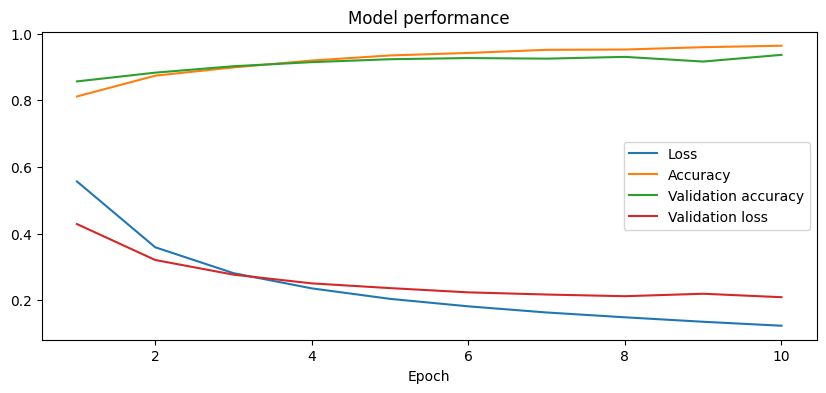

In [83]:
plt.figure(figsize=(10, 4))
plt.title("Model performance")
plt.plot(np.arange(1, 11), history.history["loss"], label="Loss")
plt.plot(np.arange(1, 11), history.history["accuracy"], label="Accuracy")
plt.plot(np.arange(1, 11), history.history["val_accuracy"], label="Validation accuracy")
plt.plot(np.arange(1, 11), history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.legend()

In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



#podemos definir la siguiente función para mostrar accuracy, el report y la matriz de confusion
def print_score(clf, X_train, y_train, X_test, y_test):
  pred = np.round(clf.predict(X_test))
  clf_report = pd.DataFrame(classification_report(y_test, 
                                                    pred, 
                                                    output_dict=True))
  print("Test Result:\n================================================")        
  print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
  print("_______________________________________________")
  print(f"Classification report:\n{clf_report}")
  print("_______________________________________________")
  print("Confusion Matrix:")
  cm = confusion_matrix(y_test, pred)

  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax, cmap='Blues');
  ax.set_xlabel('Predicted values');
  ax.set_ylabel('Real values');
  ax.xaxis.set_ticklabels([1, 0]); 
  ax.yaxis.set_ticklabels([1, 0]);
  plt.show()
  
  print('\n')

45/45 [==============================] - 0s 3ms/step
Test Result:
Accuracy Score: 92.91%
_______________________________________________
Classification report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.947291    0.912399  0.929123     0.929845      0.929833
recall       0.908708    0.949509  0.929123     0.929108      0.929123
f1-score     0.927599    0.930584  0.929123     0.929091      0.929092
support    712.000000  713.000000  0.929123  1425.000000   1425.000000
_______________________________________________
Confusion Matrix:


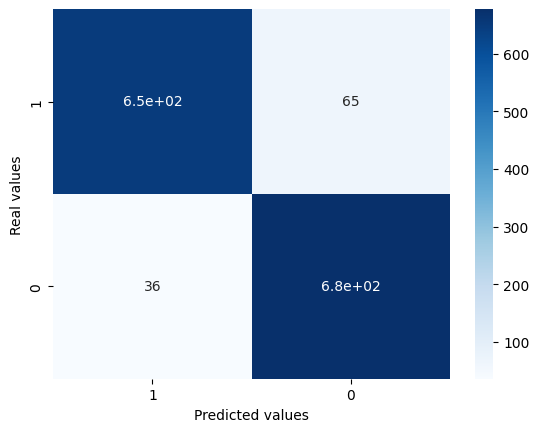

In [88]:
print_score(model, X_train, y_train, X_test, y_test)

#5. Exportación del modelo (2 puntos)

Exporta el modelo a un fichero llamado "modelo_ud06.h5" de tal forma que pueda ser utilizado en un futuro. ¿Tendrías que exportar algo más para poder hacer un uso correcto del modelo exportado?

In [86]:
model.save("modelo_ud06.h5")